In [1]:
import cv2
import requests

#### HTTP get method request

In [2]:
api_endpoint = r"http://192.168.100.2:8080"

In [3]:
response = requests.get(api_endpoint)

In [4]:
response.text

'Hello this v0.0.0.1....'

#### HTTP post method request

In [5]:
req_json = {
    "data" : "hello"
}
api_endpoint = r"http://192.168.100.2:8080/test"

In [6]:
response = requests.post(api_endpoint,json = req_json)
print(response.text)

<!doctype html>
<html lang=en>
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>



### HTTP image path request

In [7]:
import matplotlib.pyplot as plt

In [8]:
img_path = r"D:\test_1\test_car.PNG"


In [9]:
req_json = {
    "img_path" : img_path
}
api_endpoint = r"http://192.168.100.2:8080/predict_imgurl"
response = requests.post(api_endpoint,json = req_json)
print(response.text)

corolla


### HTTP image  request

(256, 256, 3)


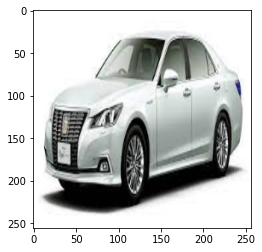

In [10]:
img= cv2.imread(img_path)
img= cv2.resize(img,(256,256))
print(img.shape)
plt.imshow(img)

In [11]:
img.shape

(256, 256, 3)

In [12]:
import base64
import numpy as np
retval, buffer = cv2.imencode('.jpg', img)
jpg_as_text = base64.b64encode(buffer)
jpg_original = base64.b64decode(jpg_as_text)
print(type(jpg_as_text))
print(type(jpg_original))

<class 'bytes'>
<class 'bytes'>


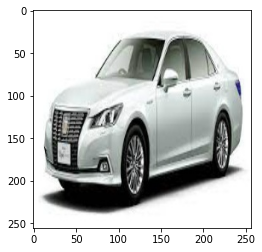

In [13]:
jpg_as_np = np.frombuffer(jpg_original, dtype=np.uint8)
img = cv2.imdecode(jpg_as_np, flags=1)
plt.imshow(img)

In [177]:
test_str_img = jpg_as_text.decode('utf-8')
print(type(test_str_img))

<class 'str'>


In [14]:
req_json = {
    "img_data" : [jpg_as_text.decode()]
}
print(type(req_json))

<class 'dict'>


In [16]:
api_endpoint = r"http://192.168.100.2:8080/predict_img"
response = requests.post(api_endpoint,json = req_json)
print(response.text)




corolla


None
